## 학습률과 배치 크기 실습

### 라이브러리 준비

In [15]:
!pip install tensorflow
!pip install plotly
!pip install ipywidgets
!pip install chart_studio
!pip install cufflinks
!pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 10.0 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.2 MB/s eta 0:00:0031m11.7 MB/s eta 0:00:01
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [16]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt

### 데이터셋 준비

In [5]:
# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### 모델링

In [6]:
# 모델 정의
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [7]:
# 학습 함수
def train_model(learning_rate, batch_size, epochs=5):
    model = create_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, 
                        batch_size=batch_size,
                        epochs=epochs, 
                        validation_split=0.1,
                        verbose=0)
    
    return history

### 학습률과 배치크기 조합 실험 설정

In [8]:
# 학습률과 배치 크기 조합 실험
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [32, 128, 512]

### 모델 훈련 / 평가

In [11]:
results = {}

for lr in learning_rates:
    for bs in batch_sizes:
        print(f"Training with learning rate: {lr}, batch size: {bs}")
        history = train_model(lr, bs)
        results[(lr, bs)] = history.history['val_accuracy'][-1]
        print(f"Validation accuracy: {results[(lr, bs)]:.4f}")
        print()

Training with learning rate: 0.1, batch size: 32
Validation accuracy: 0.3028

Training with learning rate: 0.1, batch size: 128
Validation accuracy: 0.8643

Training with learning rate: 0.1, batch size: 512
Validation accuracy: 0.9402

Training with learning rate: 0.01, batch size: 32
Validation accuracy: 0.9618

Training with learning rate: 0.01, batch size: 128
Validation accuracy: 0.9743

Training with learning rate: 0.01, batch size: 512
Validation accuracy: 0.9763

Training with learning rate: 0.001, batch size: 32
Validation accuracy: 0.9813

Training with learning rate: 0.001, batch size: 128
Validation accuracy: 0.9767

Training with learning rate: 0.001, batch size: 512
Validation accuracy: 0.9700



### 결과 시각화

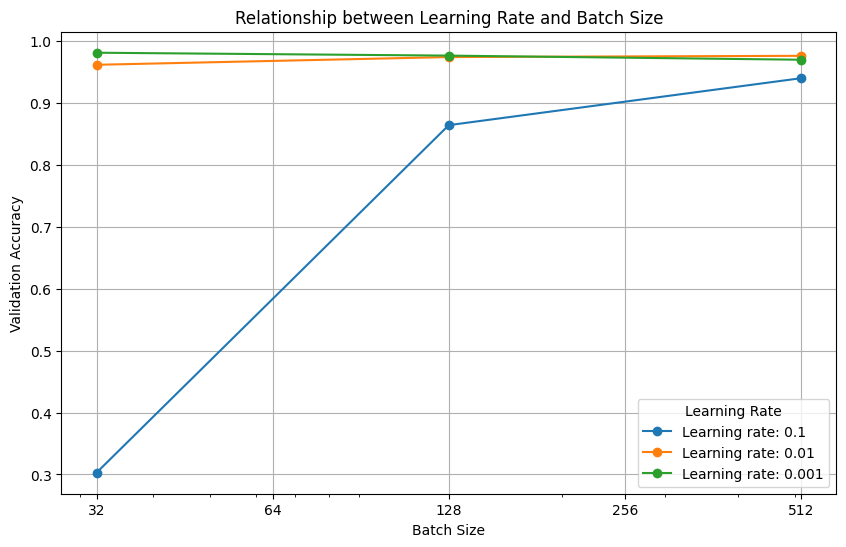

Optimal combination - Learning rate: 0.001, Batch size: 32
Best validation accuracy: 0.9813


In [19]:
# Data preparation
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    accuracies = [results[(lr, bs)] for bs in batch_sizes]
    plt.plot(batch_sizes, accuracies, marker='o', label=f'Learning rate: {lr}')

# Graph settings
plt.title('Relationship between Learning Rate and Batch Size')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy')
plt.legend(title='Learning Rate')

# Add more x-axis tick labels
plt.xticks([32, 64, 128, 256, 512], ['32', '64', '128', '256', '512'])

# Display graph
plt.grid(True)
plt.show()

# Find the optimal combination
best_lr, best_bs = max(results, key=results.get)
print(f"Optimal combination - Learning rate: {best_lr}, Batch size: {best_bs}")
print(f"Best validation accuracy: {results[(best_lr, best_bs)]:.4f}")
